# <center>_***Estadisticas de los equipos la NBA***_</center>

##  <center>_***Introducción***_</center>

  ![logo](./img/logo.jpg) 

## <center>_***Alcance***_</center>

### <center>¿Cómo se han ganado más partidos, estando en casa o de visitante?</center>
### <center>¿Qué equipos han hecho la mayor cantidad de puntos, tanto en casa como visitante?</center>
### <center>¿Cuántos partidos han ganado los distintos equipos estando en casa y de visitante?</center>
### <center>¿Cómo se ha comportado los puntos anotados a lo largo de los años?</center>
### <center>¿Contra cuáles equipos han ganado más estando en casa y visitante?</center>

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# _***Paso 1: Limpieza de datos***_

### _***1.1.***_ Se Carga el DataSet que contiene la informacion de los partidos

In [37]:
df_partidos = pd.read_csv("./DataSets/Partidos.csv")
df_partidos.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2022-12-22,22200477,Final,1610612740,1610612759,2022,1610612740,126.0,0.484,0.926,...,25.0,46.0,1610612759,117.0,0.478,0.815,0.321,23.0,44.0,1
1,2022-12-22,22200478,Final,1610612762,1610612764,2022,1610612762,120.0,0.488,0.952,...,16.0,40.0,1610612764,112.0,0.561,0.765,0.333,20.0,37.0,1
2,2022-12-21,22200466,Final,1610612739,1610612749,2022,1610612739,114.0,0.482,0.786,...,22.0,37.0,1610612749,106.0,0.470,0.682,0.433,20.0,46.0,1
3,2022-12-21,22200467,Final,1610612755,1610612765,2022,1610612755,113.0,0.441,0.909,...,27.0,49.0,1610612765,93.0,0.392,0.735,0.261,15.0,46.0,1
4,2022-12-21,22200468,Final,1610612737,1610612741,2022,1610612737,108.0,0.429,1.000,...,22.0,47.0,1610612741,110.0,0.500,0.773,0.292,20.0,47.0,0


### 1.2. A continuacion se muestran solo las columnas que vamos a utilizar en este proyecto.

In [38]:
df_partidos = df_partidos[["GAME_DATE_EST", "GAME_ID", "GAME_STATUS_TEXT", "TEAM_ID_home",
               "TEAM_ID_away","PTS_home", "PTS_away", "HOME_TEAM_WINS"]]
df_partidos.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,TEAM_ID_home,TEAM_ID_away,PTS_home,PTS_away,HOME_TEAM_WINS
0,2022-12-22,22200477,Final,1610612740,1610612759,126.0,117.0,1
1,2022-12-22,22200478,Final,1610612762,1610612764,120.0,112.0,1
2,2022-12-21,22200466,Final,1610612739,1610612749,114.0,106.0,1
3,2022-12-21,22200467,Final,1610612755,1610612765,113.0,93.0,1
4,2022-12-21,22200468,Final,1610612737,1610612741,108.0,110.0,0


### 1.3. Se convierte la fecha de formato ya que es una cadena de texto

In [39]:
df_partidos['GAME_DATE_EST'] = pd.to_datetime(df_partidos['GAME_DATE_EST'])
df_partidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26651 entries, 0 to 26650
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   GAME_DATE_EST     26651 non-null  datetime64[ns]
 1   GAME_ID           26651 non-null  int64         
 2   GAME_STATUS_TEXT  26651 non-null  object        
 3   TEAM_ID_home      26651 non-null  int64         
 4   TEAM_ID_away      26651 non-null  int64         
 5   PTS_home          26552 non-null  float64       
 6   PTS_away          26552 non-null  float64       
 7   HOME_TEAM_WINS    26651 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(1)
memory usage: 1.6+ MB


### 1.4. Una vez convertida la fecha a formato _***dateTime***_ extraeremos el año y lo almacenaremos en una nueva columna

In [40]:
df_partidos["Year"] = df_partidos["GAME_DATE_EST"].dt.year
df_partidos.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,TEAM_ID_home,TEAM_ID_away,PTS_home,PTS_away,HOME_TEAM_WINS,Year
0,2022-12-22,22200477,Final,1610612740,1610612759,126.0,117.0,1,2022
1,2022-12-22,22200478,Final,1610612762,1610612764,120.0,112.0,1,2022
2,2022-12-21,22200466,Final,1610612739,1610612749,114.0,106.0,1,2022
3,2022-12-21,22200467,Final,1610612755,1610612765,113.0,93.0,1,2022
4,2022-12-21,22200468,Final,1610612737,1610612741,108.0,110.0,0,2022


### 1.5. Se carga el DataSet de los equipos de la NBA

In [41]:
df_equipos = pd.read_csv("./DataSets/Equipos.csv")
df_equipos.head()

,LEAGUE_ID,TEAM_ID,MIN_YEAR,MAX_YEAR,ABBREVIATION,NICKNAME,YEARFOUNDED,CITY,ARENA,ARENACAPACITY,OWNER,GENERALMANAGER,HEADCOACH,DLEAGUEAFFILIATION
0,0,1610612737,1949,2019,ATL,Hawks,1949,Atlanta,State Farm Arena,18729.0,Tony Ressler,Travis Schlenk,Lloyd Pierce,Erie Bayhawks
1,0,1610612738,1946,2019,BOS,Celtics,1946,Boston,TD Garden,18624.0,Wyc Grousbeck,Danny Ainge,Brad Stevens,Maine Red Claws
2,0,1610612740,2002,2019,NOP,Pelicans,2002,New Orleans,Smoothie King Center,NaN,Tom Benson,Trajan Langdon,Alvin Gentry,No Affiliate
3,0,1610612741,1966,2019,CHI,Bulls,1966,Chicago,United Center,21711.0,Jerry Reinsdorf,Gar Forman,Jim Boylen,Windy City Bulls
4,0,1610612742,1980,2019,DAL,Mavericks,1980,Dallas,American Airlines Center,19200.0,Mark Cuban,Donnie Nelson,Rick Carlisle,Texas Legends


### 1.6. Se muestran las columnas requeridas para nuestro proyecto

In [42]:
df_equipos = df_equipos[["TEAM_ID", "CITY", "NICKNAME"]]
df_equipos.head()

,TEAM_ID,CITY,NICKNAME
0,1610612737,Atlanta,Hawks
1,1610612738,Boston,Celtics
2,1610612740,New Orleans,Pelicans
3,1610612741,Chicago,Bulls
4,1610612742,Dallas,Mavericks


### 1.7. Se unen los DataFrames que hemos creado hasta el momento

In [43]:
Juegos_locales = pd.merge(df_partidos, df_equipos, left_on = "TEAM_ID_home", right_on = "TEAM_ID", how = "inner")
Juegos_locales.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,TEAM_ID_home,TEAM_ID_away,PTS_home,PTS_away,HOME_TEAM_WINS,Year,TEAM_ID,CITY,NICKNAME
0,2022-12-22,22200477,Final,1610612740,1610612759,126.0,117.0,1,2022,1610612740,New Orleans,Pelicans
1,2022-12-22,22200478,Final,1610612762,1610612764,120.0,112.0,1,2022,1610612762,Utah,Jazz
2,2022-12-21,22200466,Final,1610612739,1610612749,114.0,106.0,1,2022,1610612739,Cleveland,Cavaliers
3,2022-12-21,22200467,Final,1610612755,1610612765,113.0,93.0,1,2022,1610612755,Philadelphia,76ers
4,2022-12-21,22200468,Final,1610612737,1610612741,108.0,110.0,0,2022,1610612737,Atlanta,Hawks


#### Se le cambia el nombre a las columnas recien añadidas

In [44]:
Juegos_locales = Juegos_locales.rename(columns={
    "CITY" : "city_home",
    "NICKNAME" : "nickname_home"
})
Juegos_locales.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,TEAM_ID_home,TEAM_ID_away,PTS_home,PTS_away,HOME_TEAM_WINS,Year,TEAM_ID,city_home,nickname_home
0,2022-12-22,22200477,Final,1610612740,1610612759,126.0,117.0,1,2022,1610612740,New Orleans,Pelicans
1,2022-12-22,22200478,Final,1610612762,1610612764,120.0,112.0,1,2022,1610612762,Utah,Jazz
2,2022-12-21,22200466,Final,1610612739,1610612749,114.0,106.0,1,2022,1610612739,Cleveland,Cavaliers
3,2022-12-21,22200467,Final,1610612755,1610612765,113.0,93.0,1,2022,1610612755,Philadelphia,76ers
4,2022-12-21,22200468,Final,1610612737,1610612741,108.0,110.0,0,2022,1610612737,Atlanta,Hawks


### 1.8. Se unen los datos de los equipos visitantes al DataFrame que se habia creado anteriormente

In [45]:
Juegos = pd.merge(Juegos_locales, df_equipos, left_on= "TEAM_ID_away", right_on="TEAM_ID", how="inner")
Juegos.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,TEAM_ID_home,TEAM_ID_away,PTS_home,PTS_away,HOME_TEAM_WINS,Year,TEAM_ID_x,city_home,nickname_home,TEAM_ID_y,CITY,NICKNAME
0,2022-12-22,22200477,Final,1610612740,1610612759,126.0,117.0,1,2022,1610612740,New Orleans,Pelicans,1610612759,San Antonio,Spurs
1,2022-12-22,22200478,Final,1610612762,1610612764,120.0,112.0,1,2022,1610612762,Utah,Jazz,1610612764,Washington,Wizards
2,2022-12-21,22200466,Final,1610612739,1610612749,114.0,106.0,1,2022,1610612739,Cleveland,Cavaliers,1610612749,Milwaukee,Bucks
3,2022-12-21,22200467,Final,1610612755,1610612765,113.0,93.0,1,2022,1610612755,Philadelphia,76ers,1610612765,Detroit,Pistons
4,2022-12-21,22200468,Final,1610612737,1610612741,108.0,110.0,0,2022,1610612737,Atlanta,Hawks,1610612741,Chicago,Bulls


### 1.9. Se le cambian los nombres de cabecera a las columnas recien añadidas

In [46]:
Juegos = Juegos.rename(columns={
    'CITY': 'city_away',
    'NICKNAME': 'nickname_away'
})
Juegos.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,TEAM_ID_home,TEAM_ID_away,PTS_home,PTS_away,HOME_TEAM_WINS,Year,TEAM_ID_x,city_home,nickname_home,TEAM_ID_y,city_away,nickname_away
0,2022-12-22,22200477,Final,1610612740,1610612759,126.0,117.0,1,2022,1610612740,New Orleans,Pelicans,1610612759,San Antonio,Spurs
1,2022-12-22,22200478,Final,1610612762,1610612764,120.0,112.0,1,2022,1610612762,Utah,Jazz,1610612764,Washington,Wizards
2,2022-12-21,22200466,Final,1610612739,1610612749,114.0,106.0,1,2022,1610612739,Cleveland,Cavaliers,1610612749,Milwaukee,Bucks
3,2022-12-21,22200467,Final,1610612755,1610612765,113.0,93.0,1,2022,1610612755,Philadelphia,76ers,1610612765,Detroit,Pistons
4,2022-12-21,22200468,Final,1610612737,1610612741,108.0,110.0,0,2022,1610612737,Atlanta,Hawks,1610612741,Chicago,Bulls


### 1.10. Se eliminan los ID de los equipos ya que no sertan usados en este analisis, se usara el _***GAME_ID***_

In [47]:
Juegos = Juegos.drop(columns=[
    "TEAM_ID_home", "TEAM_ID_away", "TEAM_ID_x", "TEAM_ID_y"
])
Juegos.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,PTS_home,PTS_away,HOME_TEAM_WINS,Year,city_home,nickname_home,city_away,nickname_away
0,2022-12-22,22200477,Final,126.0,117.0,1,2022,New Orleans,Pelicans,San Antonio,Spurs
1,2022-12-22,22200478,Final,120.0,112.0,1,2022,Utah,Jazz,Washington,Wizards
2,2022-12-21,22200466,Final,114.0,106.0,1,2022,Cleveland,Cavaliers,Milwaukee,Bucks
3,2022-12-21,22200467,Final,113.0,93.0,1,2022,Philadelphia,76ers,Detroit,Pistons
4,2022-12-21,22200468,Final,108.0,110.0,0,2022,Atlanta,Hawks,Chicago,Bulls


### 1.11. Se pone todo el DataFrame recien creado en letras minusculas

In [48]:
juegos_NBA = Juegos.copy()
juegos_NBA.columns = juegos_NBA.columns.str.lower()
juegos_NBA.head()

,game_date_est,game_id,game_status_text,pts_home,pts_away,home_team_wins,year,city_home,nickname_home,city_away,nickname_away
0,2022-12-22,22200477,Final,126.0,117.0,1,2022,New Orleans,Pelicans,San Antonio,Spurs
1,2022-12-22,22200478,Final,120.0,112.0,1,2022,Utah,Jazz,Washington,Wizards
2,2022-12-21,22200466,Final,114.0,106.0,1,2022,Cleveland,Cavaliers,Milwaukee,Bucks
3,2022-12-21,22200467,Final,113.0,93.0,1,2022,Philadelphia,76ers,Detroit,Pistons
4,2022-12-21,22200468,Final,108.0,110.0,0,2022,Atlanta,Hawks,Chicago,Bulls


### 1.12. Se crea una columna nueva en el DataFrame que contendra la suma de los pts de cada partido

In [49]:
juegos_NBA["total_points"] = juegos_NBA["pts_home"] + juegos_NBA["pts_away"]
juegos_NBA.head()

,game_date_est,game_id,game_status_text,pts_home,pts_away,home_team_wins,year,city_home,nickname_home,city_away,nickname_away,total_points
0,2022-12-22,22200477,Final,126.0,117.0,1,2022,New Orleans,Pelicans,San Antonio,Spurs,243.0
1,2022-12-22,22200478,Final,120.0,112.0,1,2022,Utah,Jazz,Washington,Wizards,232.0
2,2022-12-21,22200466,Final,114.0,106.0,1,2022,Cleveland,Cavaliers,Milwaukee,Bucks,220.0
3,2022-12-21,22200467,Final,113.0,93.0,1,2022,Philadelphia,76ers,Detroit,Pistons,206.0
4,2022-12-21,22200468,Final,108.0,110.0,0,2022,Atlanta,Hawks,Chicago,Bulls,218.0


#### Se muestran los valores mas altos de la columna _***total_points***_

In [50]:
juegos_NBA.nlargest(n=5, columns="total_points")

,game_date_est,game_id,game_status_text,pts_home,pts_away,home_team_wins,year,city_home,nickname_home,city_away,nickname_away,total_points
20030,2019-03-01,21800928,Final,161.0,168.0,0,2019,Atlanta,Hawks,Chicago,Bulls,329.0
14727,2006-12-07,20600271,Final,157.0,161.0,0,2006,Brooklyn,Nets,Phoenix,Suns,318.0
19528,2019-10-30,21900061,Final,158.0,159.0,0,2019,Washington,Wizards,Houston,Rockets,317.0
969,2022-02-25,22100899,Final,153.0,157.0,0,2022,Washington,Wizards,San Antonio,Spurs,310.0
3349,2020-07-31,21901238,Final,149.0,153.0,0,2020,Dallas,Mavericks,Houston,Rockets,302.0


#### Se muestran los valores mas bajos de la columna _***total_points***_

In [51]:
juegos_NBA.nsmallest(n=5, columns="total_points")

,game_date_est,game_id,game_status_text,pts_home,pts_away,home_team_wins,year,city_home,nickname_home,city_away,nickname_away,total_points
13632,2007-10-19,10700072,Final,36.0,33.0,1,2007,Boston,Celtics,Brooklyn,Nets,69.0
19275,2003-10-08,10300012,Final,62.0,58.0,1,2003,Indiana,Pacers,Chicago,Bulls,120.0
17807,2004-11-09,20400049,Final,64.0,60.0,1,2004,Brooklyn,Nets,Portland,Trail Blazers,124.0
16931,2005-03-13,20400927,Final,64.0,62.0,1,2005,Detroit,Pistons,Utah,Jazz,126.0
19137,2003-11-01,20300031,Final,73.0,56.0,1,2003,Minnesota,Timberwolves,Toronto,Raptors,129.0


# _***Paso 2: Graficos con MatPloit y Seaborn***_

### 2.1. Se hace el conteo de cuantas victorias en Campo local hubieron en el torneo de la NBA

In [52]:
victorias_locales = juegos_NBA["home_team_wins"].value_counts()
victorias_locales

home_team_wins
1    15645
0    11006
Name: count, dtype: int64

### 2.2. Una vez hacemos el conteo de las victorias en cancha local podemos mostrar el porcentaje de las victorias

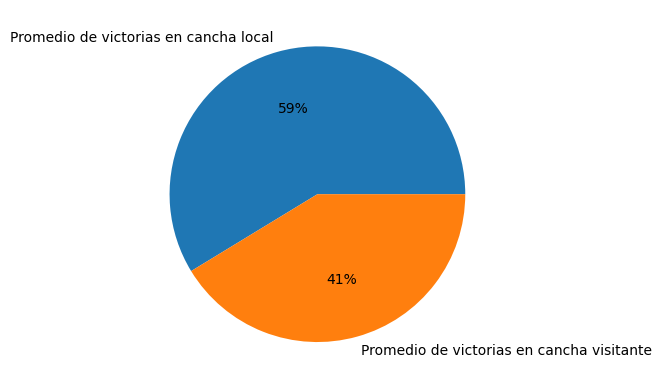

In [53]:
plt.pie(victorias_locales.values, labels=['Promedio de victorias en cancha local', 'Promedio de victorias en cancha visitante'], autopct='%.0f%%')
plt.show()

### 2.3. En el siguiente grafico de barras se muestra la cantidad de puntos por equipo cuando juegan en casa

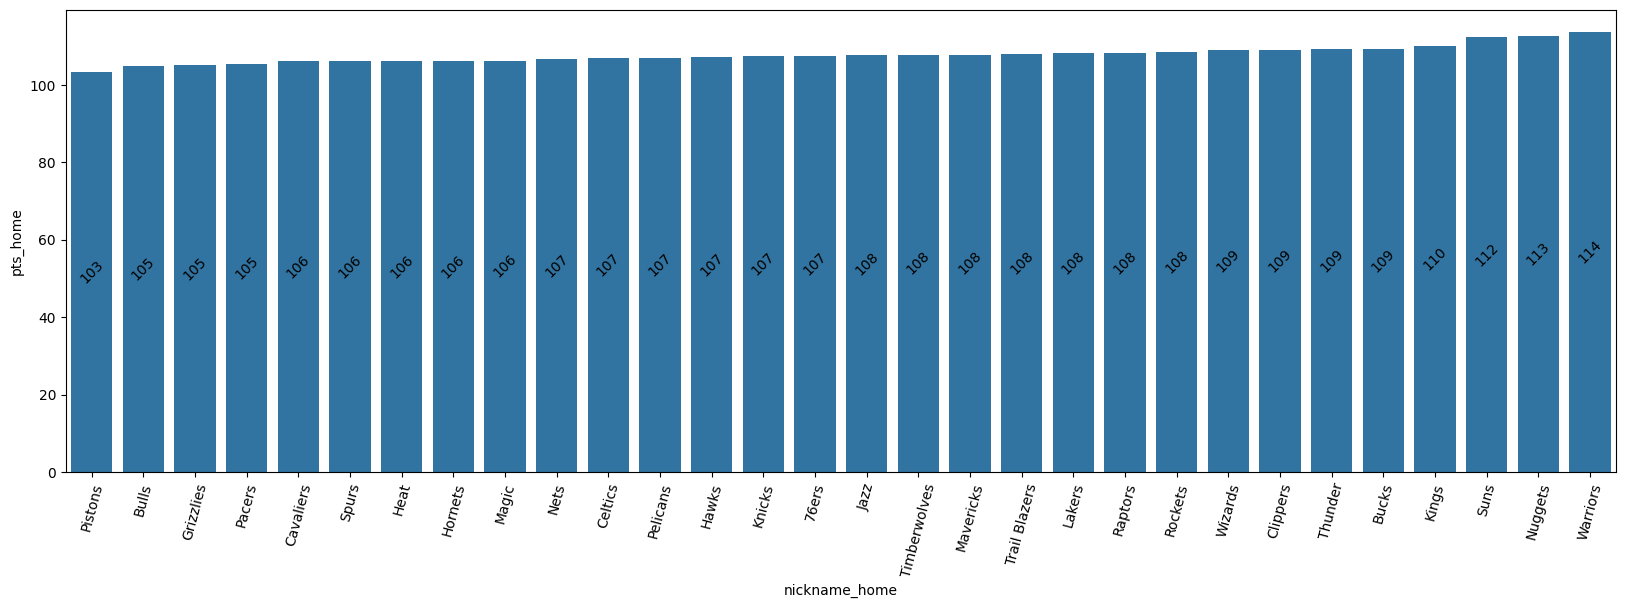

In [54]:
plt.figure(figsize=(20,6))
victoria_local = juegos_NBA[juegos_NBA["home_team_wins"]== 1]
puntos = victoria_local.groupby("nickname_home")['pts_home'].mean().reset_index().sort_values('pts_home')

ax = sns.barplot(data=victoria_local, x="nickname_home", y="pts_home", order=puntos["nickname_home"], errorbar=None)
ax.bar_label(ax.containers[-1], fmt="%.0f", label_type="center", rotation=45)
plt.xticks(rotation=75)
plt.show()

### 2.4. En el siguiente grafico de barras se muestra la cantidad de puntos por equipo cuando juegan de visitante

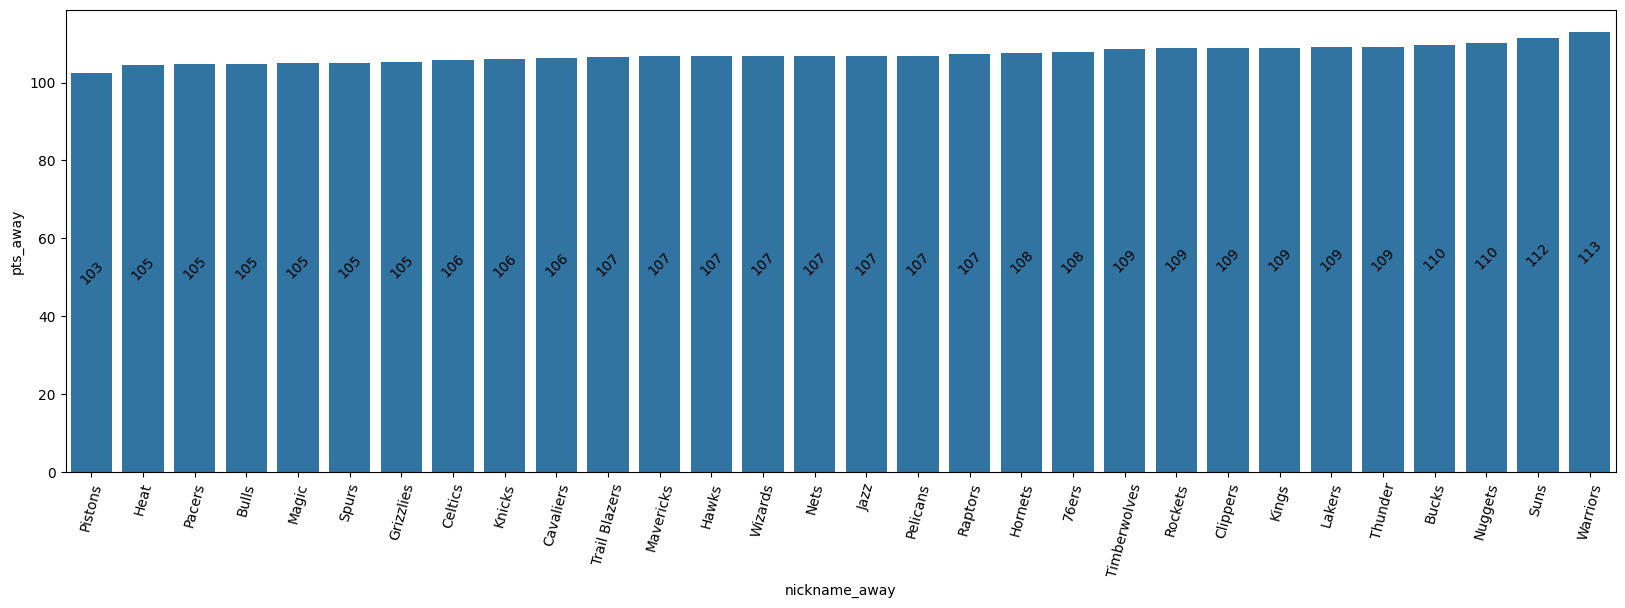

In [55]:
plt.figure(figsize=(20,6))
Victoria_visitante = juegos_NBA[juegos_NBA['home_team_wins'] == 0]
pts = Victoria_visitante.groupby('nickname_away')['pts_away'].mean().reset_index().sort_values('pts_away')

ax = sns.barplot(data=Victoria_visitante, x='nickname_away', y='pts_away', order=pts['nickname_away'], errorbar=None)
ax.bar_label(ax.containers[-1], fmt='%.0f', label_type='center', rotation=45)
plt.xticks(rotation=75)
plt.show()

### 2.5. Con este historiagrama analizamos el rango de los puntos a lo largo de los años en la NBA

<Axes: xlabel='total_points', ylabel='Count'>

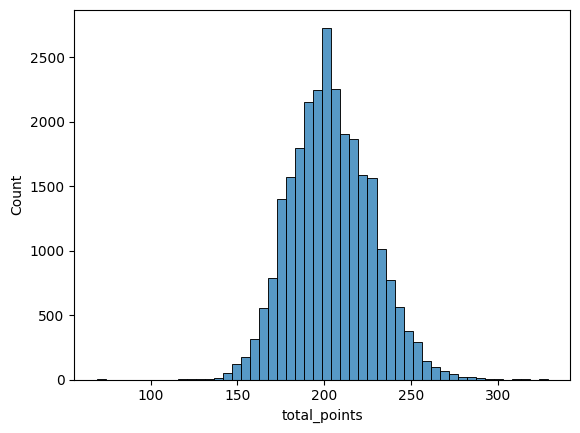

In [56]:
sns.histplot(data=juegos_NBA, x="total_points", bins=50)

### 2.6. Con este BoxPlot mostramos Los partidos con menos y mas puntos en la NBA 

<Axes: xlabel='total_points'>

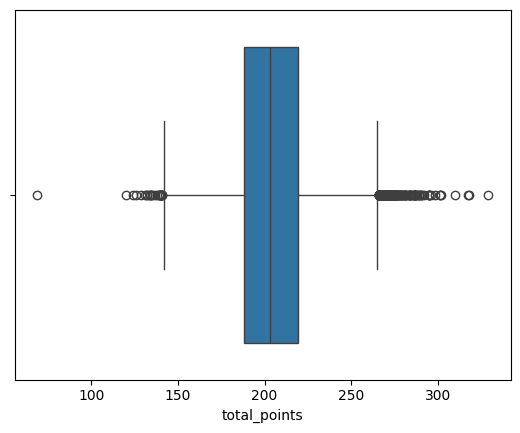

In [57]:
sns.boxplot(x=juegos_NBA["total_points"])

### 2.7. En el siguiente grafico de barras se muestran el numero de victorias que obtuvieron los equipos jugando de local

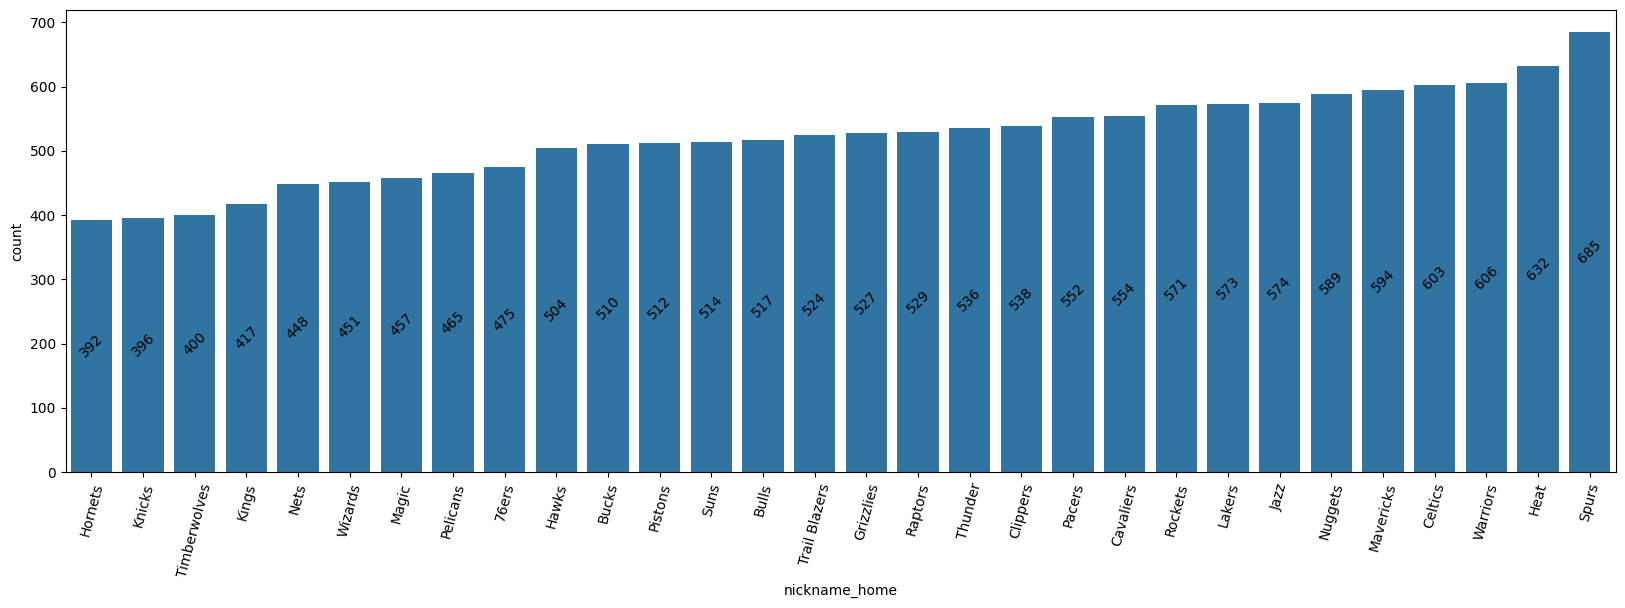

In [58]:
plt.figure(figsize=(20,6))

result = victoria_local["nickname_home"].value_counts().sort_values()

ax = sns. countplot(x= "nickname_home", data=victoria_local, order=result.index)
ax.bar_label(ax.containers[-1], label_type="center",  rotation=45)

plt.xticks(rotation=75)
plt.show()

### 2.8. En el siguiente grafico de barras se muestran el numero de victorias que obtuvieron los equipos jugando de visitante

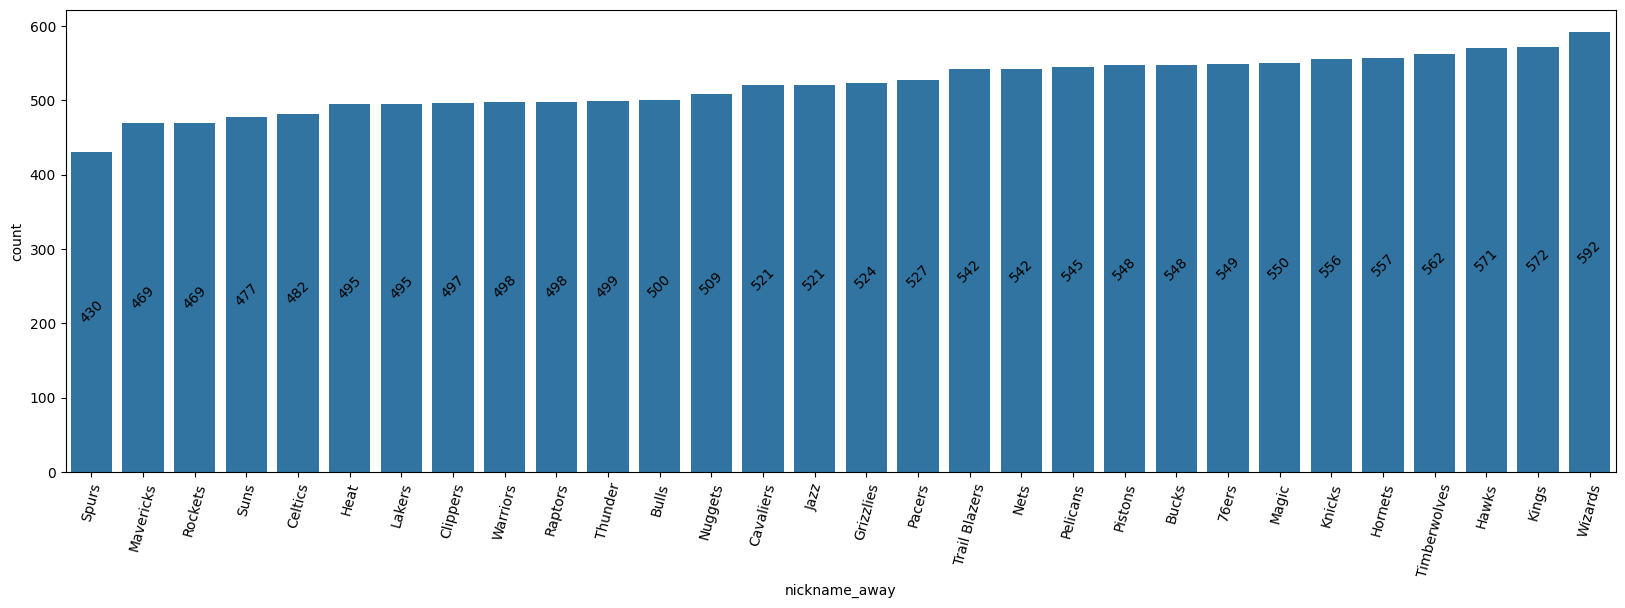

In [59]:
plt.figure(figsize=(20,6))

result = victoria_local["nickname_away"].value_counts().sort_values()

ax = sns. countplot(x= "nickname_away", data=victoria_local, order=result.index)
ax.bar_label(ax.containers[-1], label_type="center",  rotation=45)

plt.xticks(rotation=75)
plt.show()

### 2.9. Se agrupan las columnas _***Year - total_points***_

In [60]:
juegos_NBA.groupby("year")["total_points"].mean()

year
2003    184.475269
2004    188.379151
2005    193.944251
2006    195.553411
2007    196.871795
2008    198.470180
2009    200.169468
2010    199.734637
2011    197.679781
2012    192.825949
2013    197.085196
2014    201.815406
2015    200.326991
2016    207.307908
2017    211.543402
2018    216.689580
2019    221.965465
2020    224.262899
2021    221.128160
2022    224.392377
Name: total_points, dtype: float64

### 2.10. En el siguiente grafico de lineas se muestra el comportamiento de los puntos hechos en la NBA a lo largo de los años

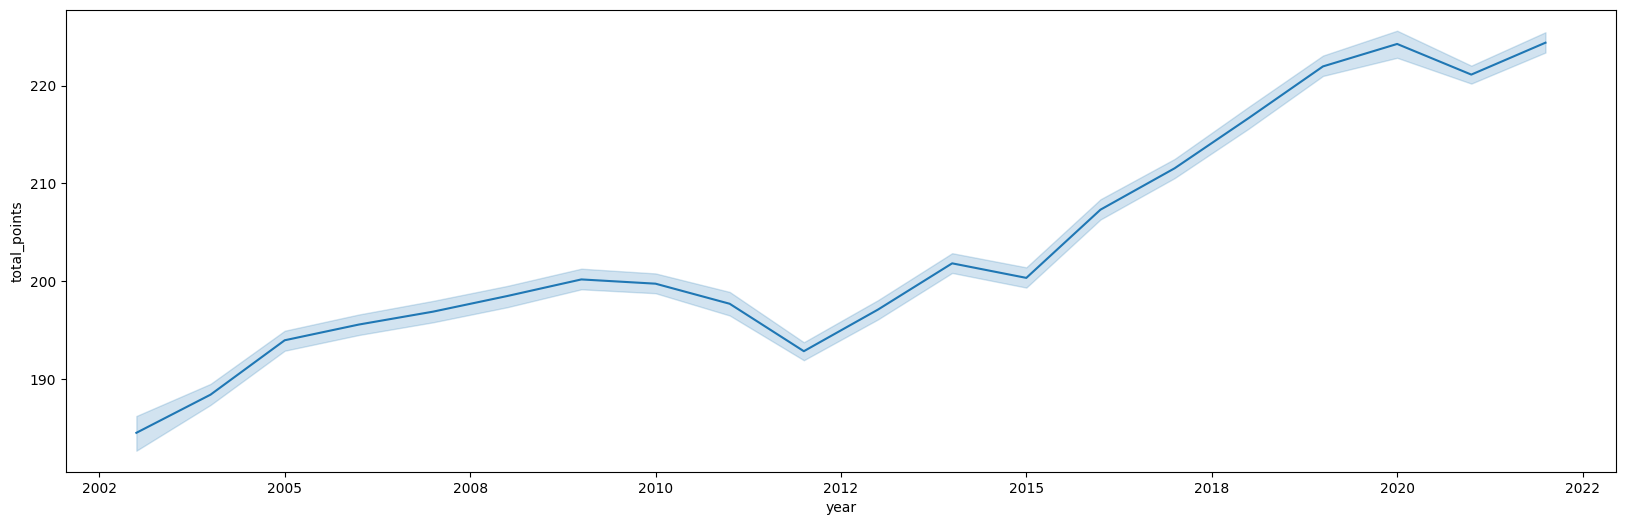

In [61]:
plt.figure(figsize=(20,6))

ax= sns.lineplot(data=juegos_NBA, x="year", y="total_points")

def format_xlabels(value, pos):
    return str(int(round(value)))

ax.xaxis.set_major_formatter(plt.FuncFormatter(format_xlabels))

plt.show()

### 2.11. Numero de partidos que se han ganado jugando como locales

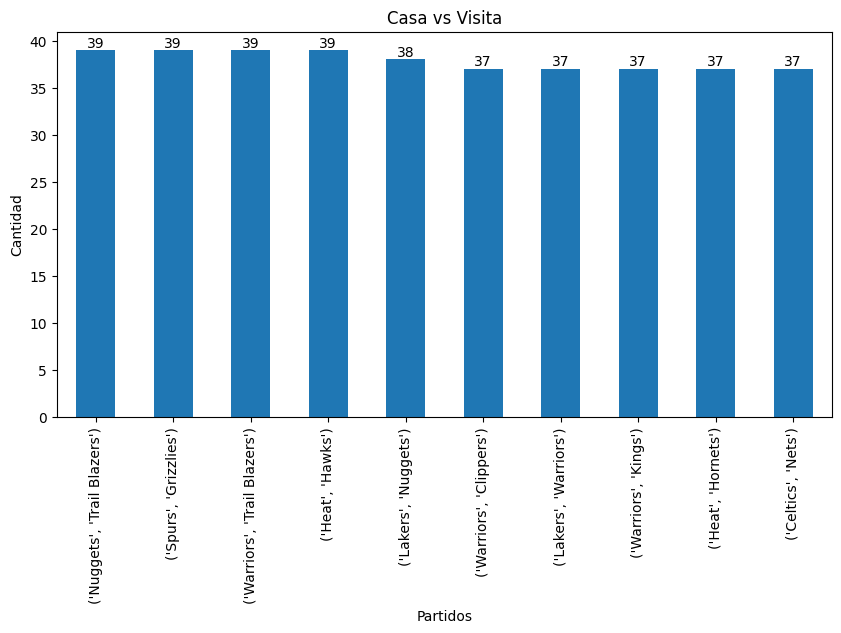

In [62]:
x = victoria_local[["nickname_home", "nickname_away"]].value_counts()

ax= x[:10].plot(kind="bar", figsize=[10,5])
ax.set_title("Casa vs Visita")
ax.set_xlabel("Partidos")
ax.set_ylabel("Cantidad")
ax.set_xticklabels(x.index[:10], rotation=90)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width()/2, p.get_height()), ha='center', va='bottom')
    
plt.show()

### 2.12. Numero de partidos que se han ganado jugando como visitante

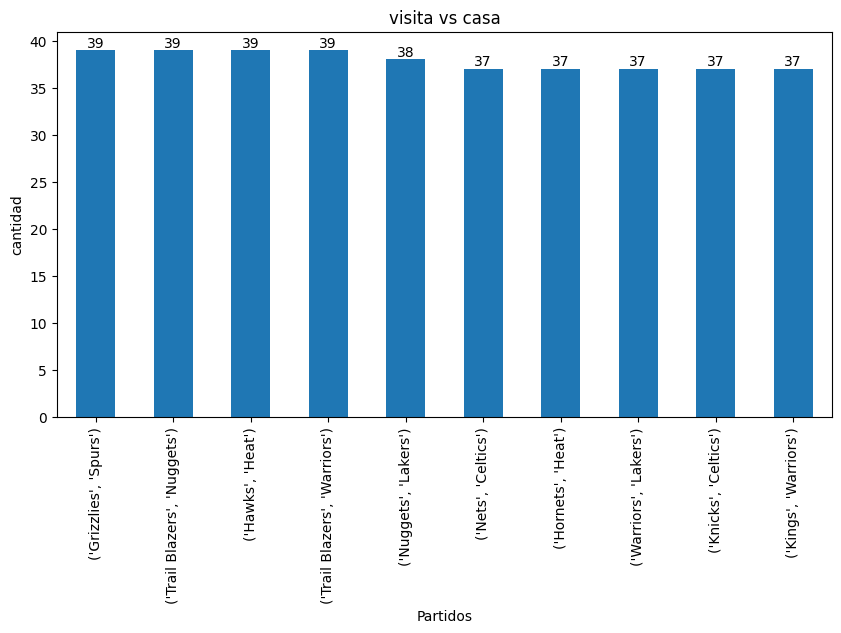

In [63]:
x = victoria_local[['nickname_away', 'nickname_home']].value_counts()

ax = x[:10].plot(kind="bar", figsize=[10, 5])
ax.set_title('visita vs casa')
ax.set_xlabel('Partidos')
ax.set_ylabel('cantidad')
ax.set_xticklabels(x.index[:10], rotation = 90)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width()/2, p.get_height()), ha='center', va='bottom')

plt.show()

## _***Paso 3: Detalle de los partidos d la NBA***_

### 3.1. Se carga el DataSet _***Detalle_partidos***_

In [64]:
df_detalle = pd.read_csv("./DataSets/Detalle_partidos.csv")
df_detalle.head()

C:\Users\Gabriel Ramírez\AppData\Local\Temp\ipykernel_21244\227648102.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_detalle = pd.read_csv("./DataSets/Detalle_partidos.csv")


,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,22200477,1610612759,SAS,San Antonio,1629641,Romeo Langford,Romeo,F,NaN,18:06,...,1.0,1.0,2.0,0.0,1.0,0.0,2.0,5.0,2.0,-2.0
1,22200477,1610612759,SAS,San Antonio,1631110,Jeremy Sochan,Jeremy,F,NaN,31:01,...,6.0,3.0,9.0,6.0,1.0,0.0,2.0,1.0,23.0,-14.0
2,22200477,1610612759,SAS,San Antonio,1627751,Jakob Poeltl,Jakob,C,NaN,21:42,...,1.0,3.0,4.0,1.0,1.0,0.0,2.0,4.0,13.0,-4.0
3,22200477,1610612759,SAS,San Antonio,1630170,Devin Vassell,Devin,G,NaN,30:20,...,0.0,9.0,9.0,5.0,3.0,0.0,2.0,1.0,10.0,-18.0
4,22200477,1610612759,SAS,San Antonio,1630200,Tre Jones,Tre,G,NaN,27:44,...,0.0,2.0,2.0,3.0,0.0,0.0,2.0,2.0,19.0,0.0


#### Se muestra la informacion del contenido del DataFrame _***df_detalle***_

In [65]:
df_detalle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668628 entries, 0 to 668627
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   GAME_ID            668628 non-null  int64  
 1   TEAM_ID            668628 non-null  int64  
 2   TEAM_ABBREVIATION  668628 non-null  object 
 3   TEAM_CITY          668628 non-null  object 
 4   PLAYER_ID          668628 non-null  int64  
 5   PLAYER_NAME        668628 non-null  object 
 6   NICKNAME           53037 non-null   object 
 7   START_POSITION     255765 non-null  object 
 8   COMMENT            109689 non-null  object 
 9   MIN                558938 non-null  object 
 10  FGM                558938 non-null  float64
 11  FGA                558938 non-null  float64
 12  FG_PCT             558938 non-null  float64
 13  FG3M               558938 non-null  float64
 14  FG3A               558938 non-null  float64
 15  FG3_PCT            558938 non-null  float64
 16  FT

### 3.2. Se muestran las columnas requeridas del DataFrame _***df_detalle***_ para nuestro proyecto

In [66]:
df_detalle = df_detalle[["GAME_ID", "PLAYER_NAME", "PTS"]]
df_detalle

,GAME_ID,PLAYER_NAME,PTS
0,22200477,Romeo Langford,2.0
1,22200477,Jeremy Sochan,23.0
2,22200477,Jakob Poeltl,13.0
3,22200477,Devin Vassell,10.0
4,22200477,Tre Jones,19.0
...,...,...,...
668623,11200005,Jordan Hamilton,17.0
668624,11200005,Kenneth Faried,18.0
668625,11200005,Kosta Koufos,6.0
668626,11200005,Timofey Mozgov,2.0


#### Se muestra la informacion del contenido del DataFrame _***df_deatlle***_

In [67]:
juegos_NBA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26651 entries, 0 to 26650
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   game_date_est     26651 non-null  datetime64[ns]
 1   game_id           26651 non-null  int64         
 2   game_status_text  26651 non-null  object        
 3   pts_home          26552 non-null  float64       
 4   pts_away          26552 non-null  float64       
 5   home_team_wins    26651 non-null  int64         
 6   year              26651 non-null  int32         
 7   city_home         26651 non-null  object        
 8   nickname_home     26651 non-null  object        
 9   city_away         26651 non-null  object        
 10  nickname_away     26651 non-null  object        
 11  total_points      26552 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int32(1), int64(2), object(5)
memory usage: 2.3+ MB


### 3.3. Se unen los DataFrame _***df_detalle - juegos_NBA***_

In [68]:
df_complete = pd.merge(df_detalle, juegos_NBA, left_on="GAME_ID", right_on="game_id", how="inner")
df_complete.head()

,GAME_ID,PLAYER_NAME,PTS,game_date_est,game_id,game_status_text,pts_home,pts_away,home_team_wins,year,city_home,nickname_home,city_away,nickname_away,total_points
0,22200477,Romeo Langford,2.0,2022-12-22,22200477,Final,126.0,117.0,1,2022,New Orleans,Pelicans,San Antonio,Spurs,243.0
1,22200477,Jeremy Sochan,23.0,2022-12-22,22200477,Final,126.0,117.0,1,2022,New Orleans,Pelicans,San Antonio,Spurs,243.0
2,22200477,Jakob Poeltl,13.0,2022-12-22,22200477,Final,126.0,117.0,1,2022,New Orleans,Pelicans,San Antonio,Spurs,243.0
3,22200477,Devin Vassell,10.0,2022-12-22,22200477,Final,126.0,117.0,1,2022,New Orleans,Pelicans,San Antonio,Spurs,243.0
4,22200477,Tre Jones,19.0,2022-12-22,22200477,Final,126.0,117.0,1,2022,New Orleans,Pelicans,San Antonio,Spurs,243.0


### 3.4. Se hace un promedio de la cantidad de puntos hechos por cada jugador en el torneo de la NBA

In [69]:
puntos_jugador = df_complete.groupby(["year", "PLAYER_NAME"])["PTS"].mean().reset_index().sort_values("year")
puntos_jugador.head(10)

,year,PLAYER_NAME,PTS
0,2003,A.J. Guyton,4.000000
307,2003,Nazr Mohammed,6.382353
306,2003,Morris Peterson,7.032258
305,2003,Moochie Norris,2.843750
304,2003,Monty Williams,2.000000
303,2003,Mo Williams,4.833333
302,2003,Mitchell Butler,2.714286
301,2003,Milt Palacio,4.880000
300,2003,Mikki Moore,1.000000
299,2003,Mike Wilks,2.285714


In [70]:
puntos_jugador[puntos_jugador['year'] == 2022].sort_values(by='PTS', ascending=False).head(10)

,year,PLAYER_NAME,PTS
11862,2022,Giannis Antetokounmpo,31.358974
11978,2022,Joel Embiid,31.166667
12094,2022,Luka Doncic,30.644444
12266,2022,Shai Gilgeous-Alexander,29.074074
12050,2022,Kevin Durant,29.029851
12081,2022,LeBron James,28.741379
11899,2022,Ja Morant,28.000000
11960,2022,Jayson Tatum,27.880000
11799,2022,Devin Booker,27.750000
12306,2022,Trae Young,27.333333
